In [1]:
import pandas as pd
import numpy as np
from os.path import join as join_path
import os
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import time

%matplotlib inline

INPUT_PATH = '../data/'
TRAIN_IMG_PATH = join_path(INPUT_PATH,'raw/train/')
TEST_IMG_PATH = join_path(INPUT_PATH,'raw/test/')
TRAIN_MASKS_PATH = join_path(INPUT_PATH,'raw/train_masks')
TRAIN_MASKS_CSV_PATH = join_path(INPUT_PATH, 'train_masks.csv')
SAMPLE_SUB_CSV_PATH = join_path(INPUT_PATH, 'sample_submission.csv')
OUTPUT_PATH = '../predictions/'

In [2]:
def read_mask_image(car_code, angle_code):
    """
    Read image mask, encoding to 0-black 1-white
    car_code: code of the car
    angle_code: code of the angle
    """
    mask_img_path = join_path(TRAIN_MASKS_PATH, car_code + '_' + angle_code + '_mask.gif')
    mask_img = np.array(Image.open(mask_img_path))
    
    return mask_img

def show_mask_image(car_code, angle_code):
    """
    Show the image mask
    """
    mask_img = read_mask_image(car_code, angle_code)
    plt.imshow(mask_img, cmap = 'Greys_r')
    plt.show()
    
def rle_encode(mask_image):
    """
    Encode the image mask.
    mask_image: numpy array, 1 - mask, 0 - background 
    Returns all pairs of values that contain a start position and a run length
    """
    pixels = mask_image.flatten()
    pixels[0] = 0
    pixels[-1] = 0
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 2
    runs[1::2] = runs[1::2] - runs[:-1:2]
    
    return runs

def rle_to_string(runs):
    return ' '.join(str(x) for x in runs)

def create_submission(encodes):
    """
    Create a submission for a given encondes
    """
    print('Create submission...')
    t = pd.read_csv(SAMPLE_SUB_CSV_PATH)
    t['rle_mask'] = encodes
    t.to_csv(join_path(OUTPUT_PATH, 'subm_{}.gz'.format(avg_score)), index=False, compression='gzip')

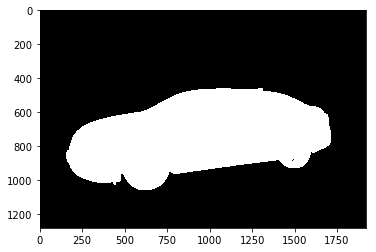

In [25]:
show_mask_image('00087a6bd4dc', '04')

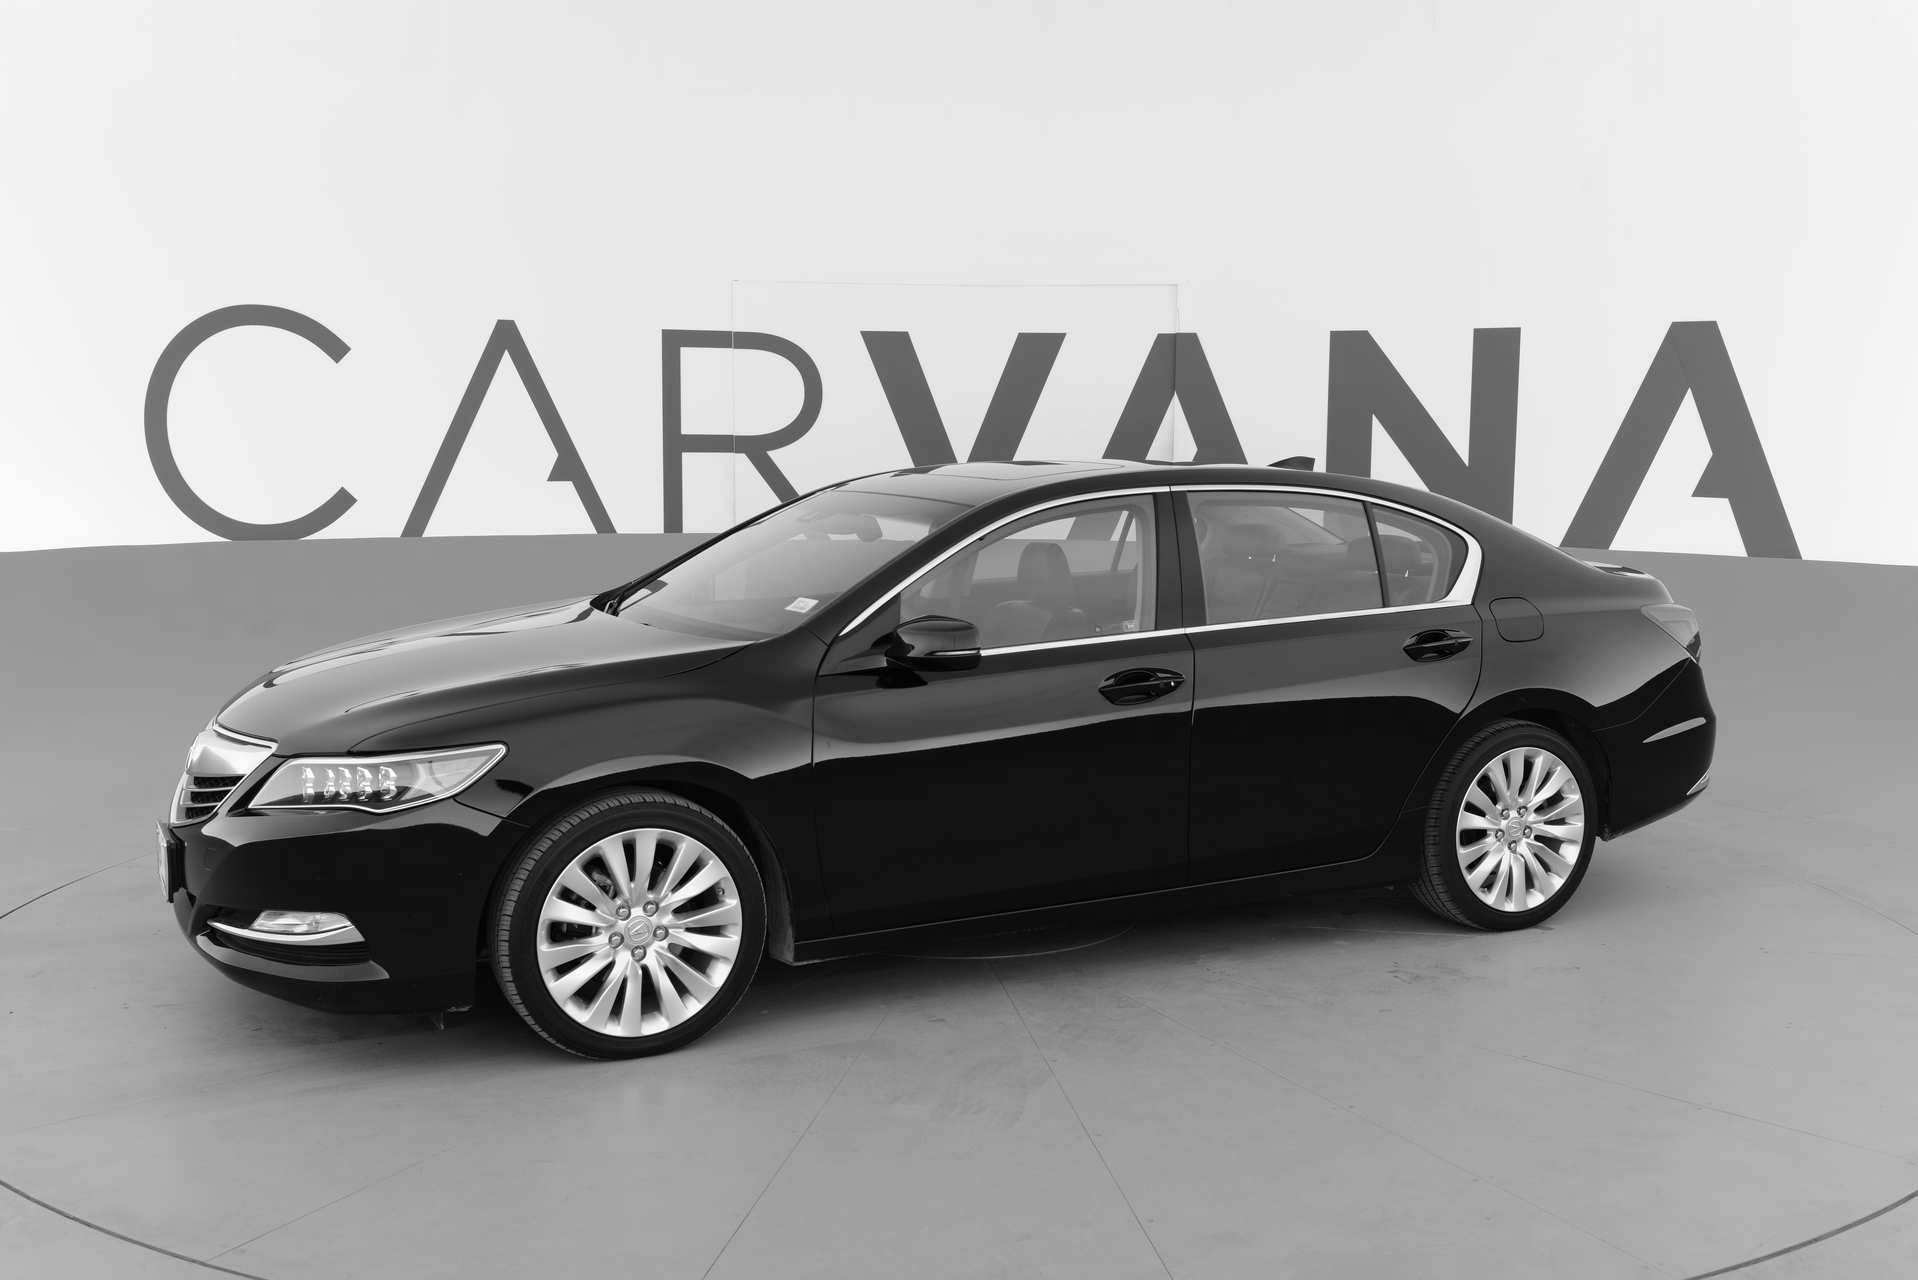

In [12]:
img = Image.open(join_path(TRAIN_IMG_PATH, '00087a6bd4dc_04.jpg')).convert('L')
go = np.array(img)
img

In [10]:
go.shape

(1280, 1918)

In [ ]:
import torch
import os
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
from PIL import Image


class CarvanaDataset(Dataset):
    def __init__(self, im_dir, mask_dir=None, transforms=None):